In [3]:
# Import Required Packages
import os
import requests
from dotenv import load_dotenv
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Load Environment Variables
load_dotenv('../../api_keys.env')

True

In [8]:
# Fetch API Key from Environment Variables
api_key = os.getenv('Alpha_Vantage_Key')

In [9]:
# Request Data From API
btc_url = "https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=USD&apikey=" + api_key
btc_data = requests.get(btc_url).json()

eth_url = "https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=ETH&market=USD&apikey=" + api_key
eth_data = requests.get(eth_url).json()

ltc_url = "https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=LTC&market=USD&apikey=" + api_key
ltc_data = requests.get(ltc_url).json()

link_url = "https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=LINK&market=USD&apikey=" + api_key
link_data = requests.get(link_url).json()

doge_url = "https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=DOGE&market=USD&apikey=" + api_key
doge_data = requests.get(doge_url).json()

In [10]:
# Create DataFrames
btc_df = pd.DataFrame.from_dict(btc_data['Time Series (Digital Currency Daily)'], orient='index')
eth_df = pd.DataFrame.from_dict(eth_data['Time Series (Digital Currency Daily)'], orient='index')
ltc_df = pd.DataFrame.from_dict(ltc_data['Time Series (Digital Currency Daily)'], orient='index')
link_df = pd.DataFrame.from_dict(link_data['Time Series (Digital Currency Daily)'], orient='index')
doge_df = pd.DataFrame.from_dict(doge_data['Time Series (Digital Currency Daily)'], orient='index')

In [11]:
# Clean DataFrames
btc_df.dropna(inplace=True)
btc_df.rename(columns={
    '4a. close (USD)':'BTC close',
}, inplace=True)
btc_df = btc_df[['BTC close']]
btc_df.sort_index(inplace=True)

eth_df.dropna(inplace=True)
eth_df.rename(columns={
    '4a. close (USD)':'ETH close',
}, inplace=True)
eth_df = eth_df[['ETH close']]
eth_df.sort_index(inplace=True)

ltc_df.dropna(inplace=True)
ltc_df.rename(columns={
    '4a. close (USD)':'LTC close',
}, inplace=True)
ltc_df = ltc_df[['LTC close']]
ltc_df.sort_index(inplace=True)

link_df.dropna(inplace=True)
link_df.rename(columns={
    '4a. close (USD)':'LINK close',
}, inplace=True)
link_df = link_df[['LINK close']]
link_df.sort_index(inplace=True)

doge_df.dropna(inplace=True)
doge_df.rename(columns={
    '4a. close (USD)':'DOGE close',
}, inplace=True)
doge_df = doge_df[['DOGE close']]
doge_df.sort_index(inplace=True)

In [12]:
# Concatenate DataFrames
crypto_ohlc = pd.concat([btc_df, eth_df, ltc_df, link_df, doge_df], axis='columns', join='inner')
crypto_ohlc["BTC close"]= crypto_ohlc["BTC close"].astype(float)
crypto_ohlc["ETH close"]= crypto_ohlc["ETH close"].astype(float)
crypto_ohlc["LTC close"]= crypto_ohlc["LTC close"].astype(float)
crypto_ohlc["LINK close"]= crypto_ohlc["LINK close"].astype(float)
crypto_ohlc["DOGE close"]= crypto_ohlc["DOGE close"].astype(float)

In [13]:
crypto_ohlc = crypto_ohlc['2019-11-30':'2021-04-30']
crypto_ohlc

,BTC close,ETH close,LTC close,LINK close,DOGE close
2019-11-30,7541.89,151.37,47.21,2.2373,0.002292
2019-12-01,7390.89,150.73,47.45,2.1638,0.002265
2019-12-02,7294.28,148.65,45.45,2.0911,0.002219
2019-12-03,7292.71,147.17,44.75,2.1222,0.002178
2019-12-04,7194.32,145.38,44.67,2.0290,0.002168
2019-12-05,7389.00,148.10,44.81,2.0068,0.002175
2019-12-06,7527.47,148.45,45.28,2.0943,0.002194
2019-12-07,7488.21,147.14,45.15,2.0440,0.002184
2019-12-08,7510.11,150.44,45.56,2.0528,0.002197
2019-12-09,7338.64,147.38,44.45,2.0984,0.002170


In [14]:
crypto_ohlc["MovAvg20dBTC"] = crypto_ohlc["BTC close"].rolling(window=20).mean()
crypto_ohlc["MovAvg20dETH"] = crypto_ohlc["ETH close"].rolling(window=20).mean()
crypto_ohlc["MovAvg20dLTC"] = crypto_ohlc["LTC close"].rolling(window=20).mean()
crypto_ohlc["MovAvg20dLINK"] = crypto_ohlc["LINK close"].rolling(window=20).mean()
crypto_ohlc["MovAvg20dDOGE"] = crypto_ohlc["DOGE close"].rolling(window=20).mean()

In [15]:
crypto_ohlc["STDEV20dBTC"] = crypto_ohlc["BTC close"].rolling(window=20).std()
crypto_ohlc["STDEV20dETH"] = crypto_ohlc["ETH close"].rolling(window=20).std()
crypto_ohlc["STDEV20dLTC"] = crypto_ohlc["LTC close"].rolling(window=20).std()
crypto_ohlc["STDEV20dLINK"] = crypto_ohlc["LINK close"].rolling(window=20).std()
crypto_ohlc["STDEV20dDOGE"] = crypto_ohlc["DOGE close"].rolling(window=20).std()

C:\Users\FinTech\anaconda3\envs\pyvizenv\lib\site-packages\pandas\plotting\_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'BTC close')

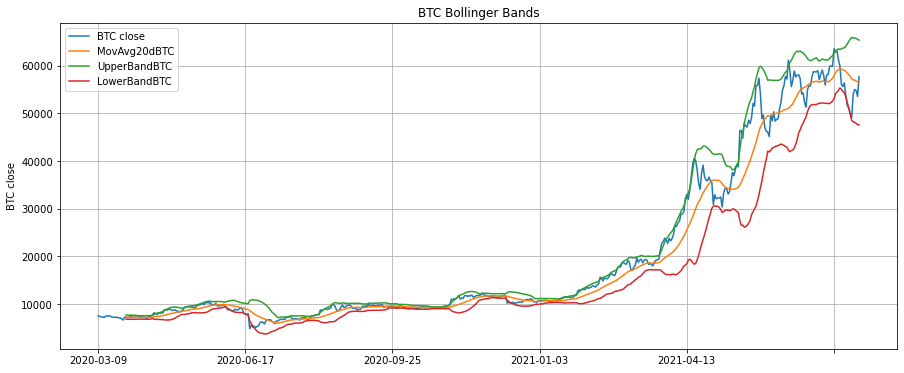

In [16]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
crypto_ohlc["UpperBandBTC"] = crypto_ohlc["MovAvg20dBTC"] + (crypto_ohlc["STDEV20dBTC"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
crypto_ohlc["LowerBandBTC"] = crypto_ohlc["MovAvg20dBTC"] - (crypto_ohlc["STDEV20dBTC"] * 2)

# Plotting
crypto_ohlc[['BTC close',"MovAvg20dBTC","UpperBandBTC","LowerBandBTC"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("BTC Bollinger Bands")
plt.axis("tight")
plt.ylabel("BTC close")

plt.savefig('bt')

C:\Users\FinTech\anaconda3\envs\pyvizenv\lib\site-packages\pandas\plotting\_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'ETH close')

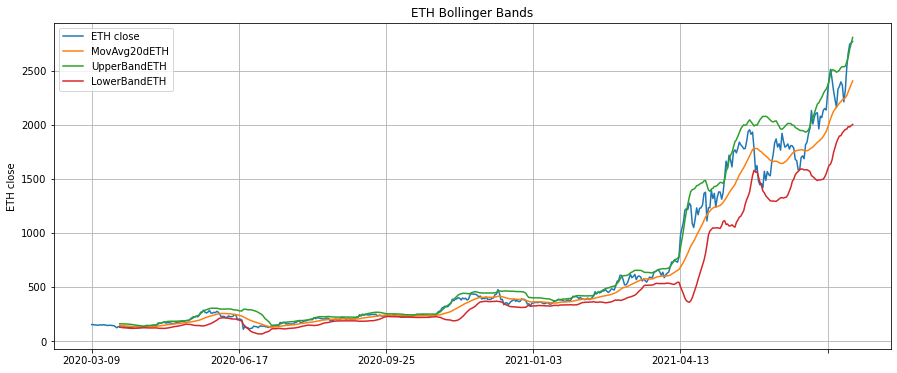

In [17]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
crypto_ohlc["UpperBandETH"] = crypto_ohlc["MovAvg20dETH"] + (crypto_ohlc["STDEV20dETH"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
crypto_ohlc["LowerBandETH"] = crypto_ohlc["MovAvg20dETH"] - (crypto_ohlc["STDEV20dETH"] * 2)

# Plotting
crypto_ohlc[['ETH close',"MovAvg20dETH","UpperBandETH","LowerBandETH"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("ETH Bollinger Bands")
plt.axis("tight")
plt.ylabel("ETH close")

C:\Users\FinTech\anaconda3\envs\pyvizenv\lib\site-packages\pandas\plotting\_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'LTC close')

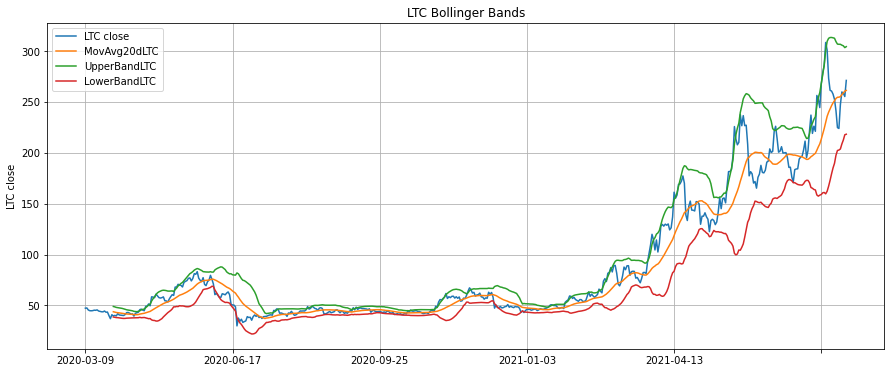

In [18]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
crypto_ohlc["UpperBandLTC"] = crypto_ohlc["MovAvg20dLTC"] + (crypto_ohlc["STDEV20dLTC"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
crypto_ohlc["LowerBandLTC"] = crypto_ohlc["MovAvg20dLTC"] - (crypto_ohlc["STDEV20dLTC"] * 2)

# Plotting
crypto_ohlc[['LTC close',"MovAvg20dLTC","UpperBandLTC","LowerBandLTC"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("LTC Bollinger Bands")
plt.axis("tight")
plt.ylabel("LTC close")

C:\Users\FinTech\anaconda3\envs\pyvizenv\lib\site-packages\pandas\plotting\_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'LINK close')

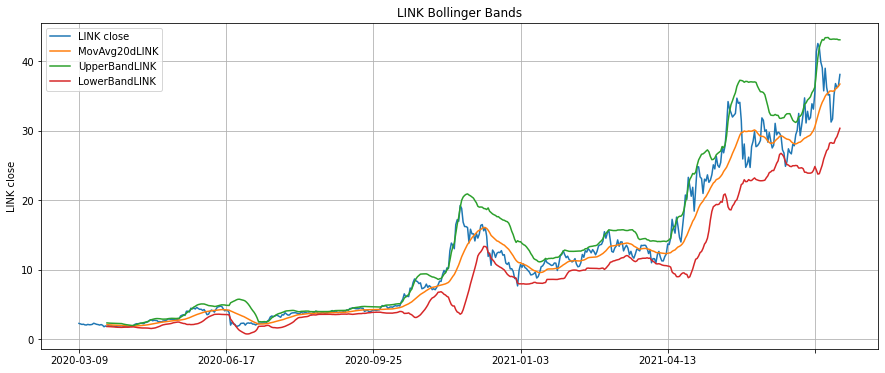

In [19]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
crypto_ohlc["UpperBandLINK"] = crypto_ohlc["MovAvg20dLINK"] + (crypto_ohlc["STDEV20dLINK"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
crypto_ohlc["LowerBandLINK"] = crypto_ohlc["MovAvg20dLINK"] - (crypto_ohlc["STDEV20dLINK"] * 2)

# Plotting
crypto_ohlc[['LINK close',"MovAvg20dLINK","UpperBandLINK","LowerBandLINK"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("LINK Bollinger Bands")
plt.axis("tight")
plt.ylabel("LINK close")

C:\Users\FinTech\anaconda3\envs\pyvizenv\lib\site-packages\pandas\plotting\_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'DOGE close')

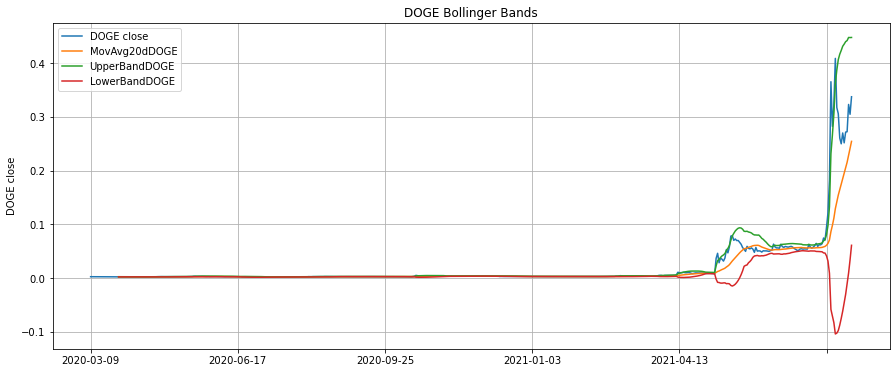

In [20]:
# Creating Upper Band column s.t. upper band = moving avg + (SD*2)
crypto_ohlc["UpperBandDOGE"] = crypto_ohlc["MovAvg20dDOGE"] + (crypto_ohlc["STDEV20dDOGE"] * 2)

# Creating Lower Band column s.t. lower band = moving avg - (SD*2)
crypto_ohlc["LowerBandDOGE"] = crypto_ohlc["MovAvg20dDOGE"] - (crypto_ohlc["STDEV20dDOGE"] * 2)

# Plotting
crypto_ohlc[['DOGE close',"MovAvg20dDOGE","UpperBandDOGE","LowerBandDOGE"]].plot(figsize=(15,6))
plt.grid(True)
plt.title("DOGE Bollinger Bands")
plt.axis("tight")
plt.ylabel("DOGE close")